In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
x_data = np.array([[0., 0.],
          [0., 1.],
          [1., 0.],
          [1., 1.]])
y_data = np.array([[0.],
          [1.],
          [1.],
          [0.]])

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_data, y_data, epochs=2000)

W0723 10:43:36.949291 140212647274368 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 28ms/sample - loss: 0.7038 - accuracy: 0.2500
Epoch 2/2000
4/4 [==============================] - 0s 666us/sample - loss: 0.7030 - accuracy: 0.2500
Epoch 3/2000
4/4 [==============================] - 0s 960us/sample - loss: 0.7021 - accuracy: 0.2500
Epoch 4/2000
4/4 [==============================] - 0s 954us/sample - loss: 0.7013 - accuracy: 0.2500
Epoch 5/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.7005 - accuracy: 0.2500
Epoch 6/2000
4/4 [==============================] - 0s 846us/sample - loss: 0.6997 - accuracy: 0.2500
Epoch 7/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6989 - accuracy: 0.2500
Epoch 8/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.6981 - accuracy: 0.2500
Epoch 9/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.6974 - accuracy: 0.5000
Epoch 10/2000
4/4 [==============================] - 0s 1ms/sample - los

In [6]:
print(model.predict_classes(x_data))

[[0]
 [0]
 [1]
 [0]]


In [7]:
score = model.evaluate(x_data, y_data, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.4786757826805115
Test accuracy: 0.75


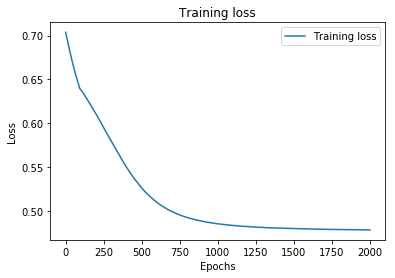

In [8]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

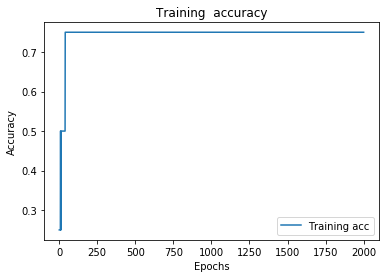

In [9]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']

plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

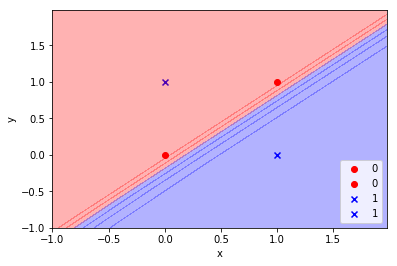

In [10]:
plt.scatter(x_data[0, 0], x_data[0, 1],color='red', marker='o', label='0')
plt.scatter(x_data[3, 0], x_data[3, 1],color='red', marker='o', label='0')
plt.scatter(x_data[1, 0], x_data[1, 1],color='blue', marker='x', label='1')
plt.scatter(x_data[2, 0], x_data[2, 1],color='blue', marker='x', label='1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

resolution=0.02
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
x1_min, x1_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
x2_min, x2_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.show()